# Additional exercises

```{exercise-start}
:label: ex_runoff_valley
```
A small watershed (3.5 km²) consists of a stream with a slope on both sides, and both slopes have the same surface area.

45% of the effective rainfall flows off the surface of the slope, and the rest infiltrates into the groundwater and flows to the stream. Due to a clay layer in the subsurface of the right slope, only 30% of the runoff infiltrated on that slope flows to the stream.

The annual precipitation is 1,000 mm/year, and the annual evaporation is 900 mm/year.

a) What is the annual runoff from the surface of both slopes?

b) What is the total annual runoff from the slope on the right?

c) What is the total annual runoff in the stream?

```{exercise-end}
```

:::{dropdown} Answer&nbsp;{ref}`ex_runoff_valley`a

$$
Q_{surface} = 0.45 * A * (P - E) 
$$

$$
= 0.45 * 3.5 * 10^6 * (1000 - 900) * 10^{-3} = 157500 \: \text{m³/year}
$$
:::


:::{dropdown} Answer&nbsp;{ref}`ex_runoff_valley`b

$$
Q_{right} = 0.5 * (Q_{surface} + 0.55 * 0.3 * A * (P-E)) 
$$

$$
= 0.5 * (157500 + 0.55 * 0.3 * 3.5 * 10^6 * (1000 - 900) * 10^{-3}) = 107625 \: \text{m³/year}
$$
:::

:::{dropdown} Answer&nbsp;{ref}`ex_runoff_valley`c

$$
Q_{total} = Q_{right} + 0.5 * A * (P-E)
$$

$$
107625 + 0.5 * 3.5 * 10^6 * (1000 - 900) * 10^{-3} = 282625 \: \text{m³/year}
$$
:::

````{exercise-start}
:label: ex_water_balance
````
The following information is known about a water basin:

||||
| --- | --- | --- |
| $Q$ | 127  | [mm/year] |
| $E_i$ | 446  | [mm/year] |
| $P$ | 775  | [mm/year] |
| $E_o$ | 0  | [mm/year] |
| $I$ | 299  | [mm/year] |
| $Q_r$ | 10  | [mm/year] |

Due to climate change, the some aspects of the water basin have changed: the interception rose by 20%, the infiltration fell by 10% and the precipitation rose by 10%. The rapid runoff through soil, river discharge and open water evaporation stayed constant.

```{figure} ../images/HC_wb_fluxesandstorage.png
---
height: 400px
---
```

a) Calculate the value of $Q_s$ in [mm/year] after the changes. Hint: we are dealing with the annual average!

b) Calculate the runoff coefficient after the changes.

c) The runoff coefficient is represented on the Budyko curve. Due to the changes, the runoff coefficient has shifted. In which direction, relative to the original situation, does the runoff coefficient move? Choose one of the directions visible in the figure below.

<!-- ```{figure} ../images/HC_ex_budyko.png
---
height: 0px

---
``` -->

````{exercise-end}
````

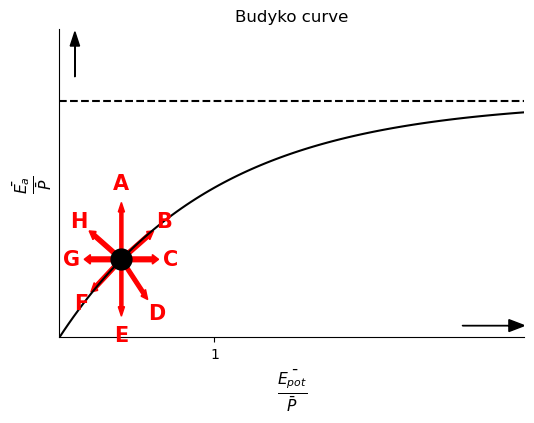

In [93]:
import numpy as np
import matplotlib.pyplot as plt

# Create figure and axis
fig, ax = plt.subplots(figsize=(6, 4))

# Generate the curve (starting at {0,0}, passing through B and F, asymptotic to y=1, more curvature at the beginning, less towards the end)
x = np.linspace(0, 3, 100)
y = 1 - np.exp(-1*x)  # Modified function to have more curvature at the beginning and flatten towards the end
ax.plot(x, y, 'k', linewidth=1.5)  # Black curve

# Draw dashed line for the asymptotic limit
ax.axhline(y=1, color='k', linestyle='dashed')

# Define the center point for arrows
center_x, center_y = 0.4, 1 - np.exp(-1*0.4)
ax.plot(center_x, center_y, '.', color = 'black', markersize = 30)

# Define angles and arrow properties
arrow_length = 0.2

# Adjusted angles for B and F to align with the curve
angles = [90, 30, 0, -45, -90, -145, 180, 150]

# Plot arrows
for angle, label in zip(angles, "ABCDEFGH"):
    dx = np.cos(np.radians(angle)) * arrow_length
    dy = np.sin(np.radians(angle)) * arrow_length
    ax.arrow(center_x, center_y, dx, dy, head_width=0.04, head_length=0.04, color='red', width = 0.02)
    ax.text(center_x + dx * 1.6, center_y + dy * 1.6, label, color='red', fontsize=15, fontweight='bold', ha='center', va='center')

# Labels and limits
ax.set_xlabel(r'$\frac{\bar{E_{pot}}}{\bar{P}}$', fontsize=16)
ax.set_ylabel(r'$\frac{\bar{E_{a}}}{\bar{P}}$', fontsize=16)
ax.set_xlim(0, x[-1])
ax.set_ylim(0, 1.3)
ax.set_xticks([1])
ax.set_yticks([])
ax.set_title('Budyko curve')

# Remove top and right spines for cleaner look
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Add arrows to x and y axes
ax.arrow(x[-1] -0.4, 0.05, 0.3, 0, head_width=0.05, head_length=0.1, fc='black', ec='black')  # X-axis arrow
ax.arrow(0.1, 1.1, 0, 0.13, head_width=0.06, head_length=0.06, fc='black', ec='black')  # Y-axis arrow

# Show plot
plt.show()

:::{dropdown} Answer&nbsp;{ref}`ex_water_balance`a
$$
\frac{dS_{s}}{dt} = P - E_i - I - Q_s = 0
$$

$$
Q_s = P - E_i - I = 1.1 * 775 - 1.2 * 446 - 0.9 * 299 = 48.2 \: \text{[mm/year]}
$$
:::


:::{dropdown} Answer&nbsp;{ref}`ex_water_balance`b
$$
C = \frac{Q_{avg}}{P_{avg}} = \frac{127}{852.5} = 0.149 \: \text{[-]}
$$
:::



:::{dropdown} Answer&nbsp;{ref}`ex_water_balance`c

$$
C_{original} = \frac{Q_{avg, original}}{P_{avg, original}} = \frac{127}{775} = 0.164 \: \text{[-]}
$$

$$
C_{new} = 0.149 \: \text{[-]}
$$

$$
C = 1 - \frac{E_{avg}}{P_{avg}}
$$

As $C$ decreases, $E / P$ rises. Hence, direction B is correct.
:::